In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

filenames = ['maltrisQLGraphData.save',
             'maltrisQL3rstateGraphData2.save',
             'maltrisQLRandomGraphData.save',
             ]
legendNames = ['Q-Learning 2-Row State',
               'Q-Learning 3-Row State',
               'Random State',
              ]

plotColors = ['r', 'y', 'g']

In [2]:
#open file and read in variables
filedGamesPlayed = []
filedGameLevels = []
filedGameClears = []
for i in range(0, len(filenames)):
    f2 = open(filenames[i], 'rb')
    gamesPlayed = pickle.load(f2)
    gameLevels = pickle.load(f2)
    gameClears = pickle.load(f2)
    f2.close()
    filedGamesPlayed.append(gamesPlayed-10) #skip first 10 datapoints, noise in data
    filedGameLevels.append(gameLevels[10:])
    filedGameClears.append(gameClears[10:])

In [3]:
#CALCULATE THE AVERAGE GAME LEVELS AND PLTLVLS
filedXvals = []
filedGameLevelAverages = []
filedGameClearAverages = []
for filenum in range(0, len(filenames)):
    xval = []
    lvlavg = []
    clearavg = []
    pltlvlavg = []
    pltclearavg = []
    for i in range(0, filedGamesPlayed[filenum]):
        xval.append(i)
        lvlavg.append(filedGameLevels[filenum][i])
        clearavg.append(filedGameClears[filenum][i])
        pltlvlavg.append(np.mean(lvlavg))
        pltclearavg.append(np.mean(clearavg))
    filedXvals.append(xval[10:]) #skip first 10 datapoints, noise in data
    filedGameLevelAverages.append(pltlvlavg[10:])
    filedGameClearAverages.append(pltclearavg[10:])

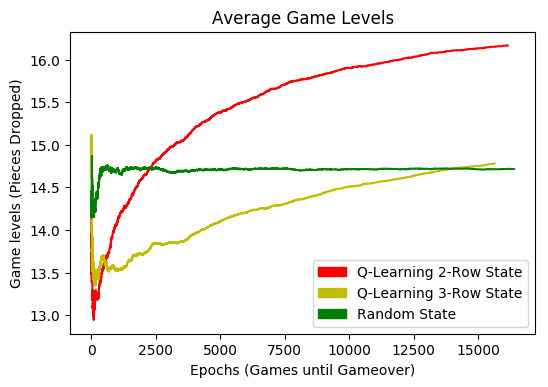

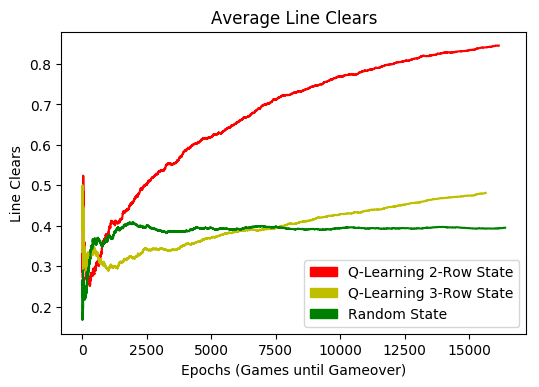

''

In [4]:
''''''''''''''''''
#PLOT ALL THE GAME LEVELS
legendHandles = []
fig = plt.figure(figsize=(6, 4), dpi=100)
plt.title("Average Game Levels")
plt.xlabel("Epochs (Games until Gameover)")
plt.ylabel("Game levels (Pieces Dropped)")
for filenum in range(0, len(filenames)):
    legendHandles.append(mpatches.Patch(color=plotColors[filenum], label = legendNames[filenum]))
    plt.plot(filedXvals[filenum], filedGameLevelAverages[filenum], plotColors[filenum])
plt.legend(handles = legendHandles)
plt.savefig('avgLvlPlot.png')
plt.show()
''''''''''''''''''
#PLOT ALL THE GAME CLEARS
legendHandles = []
fig = plt.figure(figsize=(6, 4), dpi=100)
plt.title("Average Line Clears")
plt.xlabel("Epochs (Games until Gameover)")
plt.ylabel("Line Clears")
for filenum in range(0, len(filenames)):
    legendHandles.append(mpatches.Patch(color=plotColors[filenum], label = legendNames[filenum]))
    plt.plot(filedXvals[filenum], filedGameClearAverages[filenum], plotColors[filenum])
plt.legend(handles = legendHandles)
plt.savefig('avgClearsPlot.png')
plt.show()
''''''''''''''''''